<a href="https://colab.research.google.com/github/TuguduMiamMiam/Projet-piscine/blob/main/starters/od-project-starter/od-project/notebooks/yolo_coco128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connexion à Drive
Optionnelle car on utilisera dans notre cas github


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Pour github : à exécuter dans le terminal de colab

git clone https://github.com/MGentieu/dl_project.git

# Object Detection Starter — Colab/Kaggle Quickstart

> Author : Badr TAJINI

**Academic year:** 2025–2026  
**School:** ECE  
**Course:** Machine Learning & Deep Learning 2

---

Follow this guide to validate the YOLOv8 starter on a free GPU runtime. You will confirm the environment, install dependencies, run a smoke prediction, and optionally fine-tune/evaluate on coco128.

## 0. Project files

- Option A: `git clone <your_repo_url> od-project`
- Option B: Upload the `od-project` folder via the sidebar (ensure it appears as `/content/od-project`).

Run the next cells afterwards; they will error helpfully if the folder is missing.

### Quick checklist before running code
- Switch the runtime to **GPU (T4)** first.
  - Colab: `Runtime → Change runtime type → GPU → Save`.
  - Kaggle: gear icon → enable **Accelerator**, choose `T4 x1`.
- Wait for the runtime to reconnect and show a GPU badge.
- Execute cells from top to bottom. If a cell fails, fix it and rerun that cell before moving on.

### How to run a cell
- Click the ▶️ button to the left of a cell, or press **Shift+Enter** (Colab) / **Ctrl+Enter** (Kaggle).
- When a cell finishes, the number on the left becomes `[1]`, `[2]`, etc.
- Don’t skip steps—the later ones depend on the earlier setup.

### Step 0 — Confirm the GPU is ready
Run the next cell. You should see GPU name and memory. If you see `nvidia-smi unavailable`, the runtime is still on CPU—return to the checklist, enable GPU, then rerun this cell.

In [1]:
!nvidia-smi || echo "nvidia-smi unavailable (CPU runtime)"


Tue Dec  2 17:47:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Step 1 — Point the notebook at the project folder
This cell ensures the current working directory is `od-project`.
If it raises a `FileNotFoundError`, confirm where you uploaded/cloned the folder and adjust the path before rerunning.

In [2]:
import os
import sys
from pathlib import Path

# The user has provided the explicit path to the project root.
PROJECT_ROOT = Path("/content/dl_project/starters/od-project-starter/od-project")

print(f"Environment: Colab/Kaggle (remote server), using provided PROJECT_ROOT")

# Validate structure
if not (PROJECT_ROOT / "src").exists():
    raise FileNotFoundError(f"Missing src/ directory at {PROJECT_ROOT}")

# Setup Python path
os.chdir(PROJECT_ROOT)
src_path = str(PROJECT_ROOT / "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

print(f"Project root: {PROJECT_ROOT}")
print(f"Working directory: {Path.cwd()}")


Environment: Colab/Kaggle (remote server), using provided PROJECT_ROOT
Project root: /content/dl_project/starters/od-project-starter/od-project
Working directory: /content/dl_project/starters/od-project-starter/od-project


### Step 2 — Install the project requirements
Installs Ultralytics + supporting libraries from `requirements.txt`. First run downloads the YOLO packages, which may take a couple of minutes.
If installation fails (e.g., due to connectivity), rerun this cell before proceeding.

In [5]:
# Install project dependencies listed in requirements.txt
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00


In [8]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 125.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 131.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [3]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


CUDA available: True
CUDA device: Tesla T4


In [4]:
!pip install ultralytics --upgrade

### Step 3 — Run the smoke test
This loads the pretrained YOLO weights specified in the config and runs a single prediction on a sample image. It writes `outputs/smoke_metrics.json` so you know the toolkit is ready.
If you hit a download error, wait briefly and rerun the cell.

In [11]:
print(open("configs/yolo_coco128.yaml").read())




task: object_detection
seed: 42
output_dir: outputs

model:
  weights: yolov8n.pt

data:
  yaml: coco128.yaml
  imgsz: 640
  batch: 16

train:
  epochs: 5
  lr0: 0.01
  weight_decay: 0.0005
  patience: 20

device: 0



In [13]:
from src import smoke_check
import importlib
importlib.reload(smoke_check)

smoke_path = smoke_check.run_smoke("configs/yolo_coco128.yaml")
print(smoke_path.read_text())


{
  "num_boxes": 6,
  "mean_confidence": 0.6556,
  "imgsz": 640,
  "weights": "yolov8n.pt"
}


## 1. Review smoke-test output
- Confirm the previous cell printed a JSON block showing the number of detections and mean confidence.
- `outputs/smoke_metrics.json` should now appear in the file browser.
- Need only a quick environment check? Stop here. Ready to fine-tune? Continue to Section 2.
- If anything failed, read the message, fix the issue, and rerun the smoke cell before moving on.

## 2. Full training run (optional)
Run these cells when you want to fine-tune YOLOv8 on `coco128` (or your own dataset). On the first run, downloading the dataset weights can take a couple of minutes.

**Before running:**
1. Open `configs/yolo_coco128.yaml` if you want to edit epochs, batch size, or dataset paths.
2. Ensure the runtime still shows a GPU connection.
3. Close other heavy tabs so the GPU memory stays available.

In [14]:
# Train the model using the default coco128 configuration.
# Ultralytics manages the training loop and saves weights to outputs/train/weights/.
!python src/train.py --config configs/yolo_coco128.yaml


Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=True,

In [15]:
# Evaluate the best checkpoint on the validation split.
# Results (mAP, precision, recall) are saved to outputs/eval.json.
!python src/evaluate.py --config configs/yolo_coco128.yaml --ckpt outputs/train/weights/best.pt


Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1475.3±424.7 MB/s, size: 73.3 KB)
val: Scanning /content/dl_project/starters/od-project-starter/od-project/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 2.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 3.4it/s 2.3s
                   all        128        929      0.675      0.586      0.653      0.487
                person         61        254      0.805      0.677      0.771      0.547
               bicycle          3          6      0.481      0.333      0.385      0.292
                   car         12         46      0.721      0.217      0.287      0.186
            motorcycle          4          5      0.688      0.888      0.938 

### Step 4 — What should I see now?
- `outputs/train/weights/best.pt`: best fine-tuned weights.
- `outputs/train/results.csv` and `outputs/train/events/`: Ultralytics training logs.
- `outputs/eval.json`: validation metrics (mAP50, mAP, precision, recall).
- Optional: run `python src/predict.py ...` to generate annotated images.
If any files are missing, scroll up for errors in the training/evaluation cells.

## 3. Mirror this workflow for custom datasets
1. Duplicate this notebook for your dataset (e.g., `01_custom_yolo.ipynb`).
2. Update the config file (e.g., `configs/yolo_custom.yaml`) to point at your `data.yaml`.
3. Swap the train/eval commands to use the custom config and checkpoint paths.
4. Use `python src/predict.py --config <cfg> --ckpt <weights> --source <images>` to test the trained model.

Keep the order (GPU check → install → smoke test → train → evaluate) for reliable, reproducible runs.

# On affiche à présent les résultats obtenus :

1. Affichage des métriques globales du modèle :

In [16]:
import json

with open("outputs/metrics.json", "r") as f:
    metrics = json.load(f)

metrics

{'run_dir': 'outputs/train',
 'best_weights': 'outputs/train/weights/best.pt',
 'metrics': {'map50': 0.652948919407326,
  'map': 0.48657843926128913,
  'precision': 0.6748354909492364,
  'recall': 0.5861194234374383}}

2. Affichage de la matrice de confusion

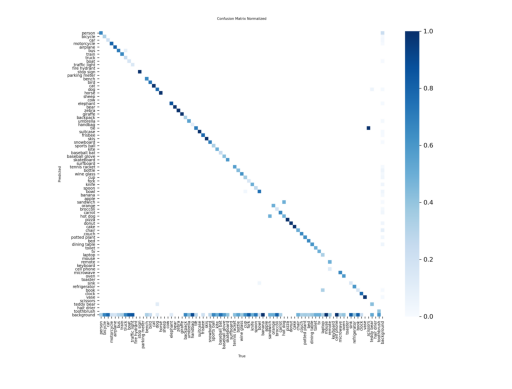

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("outputs/train/confusion_matrix_normalized.png")
plt.imshow(img)
plt.axis('off')
plt.show()

3. Affichage de leaderboard

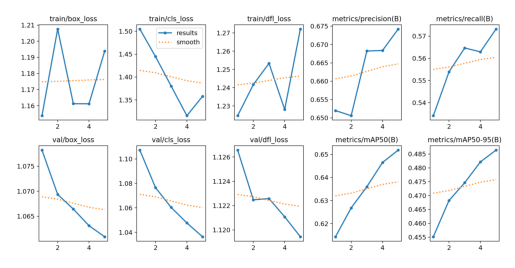

In [21]:
img = Image.open("outputs/train/results.png")
plt.imshow(img)
plt.axis('off')
plt.show()

4. Affichage des résultats en fonction des époques